In [ ]:
!pip install simpletransformers==0.63.4

In [ ]:
from simpletransformers.t5 import T5Model, T5Args
from torch import cuda

In [ ]:
model = T5Model("t5", "thanathorn/mt5-cpe-kmutt-thai-sentence-sum", use_cuda=cuda.is_available())

You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.


In [ ]:
!pip install -U pythainlp pythainlp[full]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/shopping.csv', sep='\t', names=['text', 'sentiment'], header=None)
df

text  sentiment
0                                                 text  sentiment
1      ‡πÄ‡∏Å‡∏•‡∏µ‡∏¢‡∏î ‡∏ä‡∏≠‡∏ö‡∏´‡∏•‡∏≠‡∏Å‡πÉ‡∏´‡πâ‡∏™‡∏±‡πà‡∏á‡∏ã‡∏∑‡πâ‡∏≠ ‡∏ó‡∏µ‡πà‡πÑ‡∏´‡∏ô‡πÑ‡∏î‡πâ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏™‡∏¥‡πâ‡∏ô‡∏Ñ‡πâ‡∏≤        neg
2                                     ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤‡∏î‡πâ‡∏≠‡∏¢‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û        neg
3    ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤‡∏´‡∏°‡∏î‡∏ó‡∏≥‡πÑ‡∏°‡πÑ‡∏°‡πà‡πÅ‡∏à‡πâ‡∏á‡∏Ç‡∏∂‡πâ‡∏ô‡∏ß‡πà‡∏≤‡∏´‡∏°‡∏î‡∏≠‡∏∞.‡∏Å‡∏î‡πÉ‡∏™‡πà‡∏ï‡∏∞‡∏Å‡∏£‡πâ‡∏≤‡πÑ‡∏õ...        neg
4                  ‡∏≠‡∏¢‡πà‡∏≤‡∏ó‡∏≥‡πÅ‡∏ö‡∏ö‡∏ô‡∏µ‡πâ‡∏Å‡∏±‡∏ö‡πÉ‡∏Ñ‡∏£‡∏≠‡∏µ‡∏Å‡∏ô‡∏∞‡∏Ñ‡πà‡∏∞‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å‡∏Ñ‡πà‡∏∞        neg
..                                                 ...        ...
124  ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤‡∏°‡∏µ‡∏ï‡∏≥‡∏´‡∏ô‡∏¥ ‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å‡πÜ ‡πÑ‡∏°‡πà‡πÑ‡∏´‡∏ß‡πÜ‡πÄ‡∏•‡∏¢ ‡∏ñ‡πâ‡∏≤‡∏°‡∏µ‡∏ï‡∏≥‡∏´‡∏ô‡∏¥‡∏Å‡πá‡∏ö...        neg
125     ‡πÄ‡∏õ‡∏£‡∏≤‡∏∞‡∏ö‡∏≤‡∏á‡∏°‡∏≤‡∏Å‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏Ç‡πá‡∏á‡πÅ‡∏£‡∏á‡∏ô‡πâ‡∏≠‡∏¢ ‡∏°‡∏±‡∏ô‡∏á‡πà‡∏≤‡∏¢‡∏ï‡πà‡∏≠‡∏Å‡∏≤‡∏£‡πÅ‡∏ï‡∏Å‡∏´‡∏±‡∏Å        neg
126     ‡∏Ç‡∏ô‡∏™‡πà‡∏á‡∏Å‡πá‡∏ä‡πâ‡∏≤‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤‡∏°‡∏µ‡∏ï‡∏≥‡∏´‡∏ô‡∏¥‡πÅ‡∏û‡πá‡∏Ñ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏î‡∏µ‡∏°‡∏µ‡∏£‡∏≠‡∏¢‡∏ö‡∏∏‡∏ö        neg
127  ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Ç‡∏≠‡∏á‡∏õ‡∏•‡∏≠‡∏° ‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏Ñ‡∏£‡∏µ‡∏°‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏ã‡∏≠‡∏á 10 ‡∏ö‡∏≤‡∏ó ...        neg
128                     ‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡πÑ‡∏°‡πà‡∏î‡∏µ ‡∏ó‡∏µ‡πà‡∏à‡∏±‡∏ö‡πÑ‡∏°‡πà‡∏î‡∏µ‡πÅ‡∏•‡∏∞‡∏™‡∏±‡πâ‡∏ô        neg

[129 rows x 2 columns]

<Axes: >

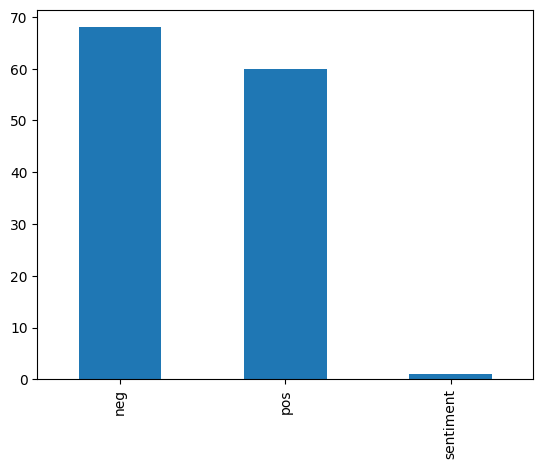

In [ ]:
df['sentiment'].value_counts().plot.bar()

In [ ]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['‡πÑ‡∏°‡πà‡∏Ñ‡πà‡∏≠‡∏¢',
 '‡∏â‡∏±‡∏ô',
 '‡πÄ‡∏ä‡∏∑‡πà‡∏≠',
 '‡∏ô‡πà‡∏≤',
 '‡πÄ‡∏ï‡πá‡∏°‡πÜ',
 '‡πÄ‡∏´‡∏•‡πà‡∏≤',
 '‡∏ö‡∏≤‡∏á‡∏Ñ‡∏£‡∏≤',
 '‡∏Ç‡∏∂‡πâ‡∏ô',
 '‡∏™‡∏π‡∏á‡∏™‡πà‡∏á',
 '‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏ß‡∏á',
 '‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏û‡∏£‡∏≤‡∏∞',
 '‡∏ó‡∏µ‡πà‡πÜ',
 '‡∏Å‡∏ß‡πà‡∏≤',
 '‡∏ï‡∏≤‡∏°‡∏î‡πâ‡∏ß‡∏¢',
 '‡πÄ‡∏ä‡πà‡∏ô‡∏î‡∏±‡∏á‡∏ó‡∏µ‡πà',
 '‡∏î‡πâ‡∏ß‡∏¢‡πÄ‡∏´‡∏ï‡∏∏‡πÄ‡∏û‡∏£‡∏≤‡∏∞',
 '‡∏™‡∏°‡∏±‡∏¢‡∏Å‡πà‡∏≠‡∏ô',
 '‡πÄ‡∏¢‡∏≠‡∏∞‡πÅ‡∏¢‡∏∞',
 '‡∏Å‡πá‡∏ï‡πà‡∏≠‡πÄ‡∏°‡∏∑‡πà‡∏≠',
 '‡∏ó‡πç‡∏≤',
 '‡∏°‡∏±‡πâ‡∏¢‡πÄ‡∏ô‡∏µ‡πà‡∏¢',
 '‡∏¢‡∏Å‡πÉ‡∏´‡πâ',
 '‡∏ú‡∏π‡πâ‡πÉ‡∏î',
 '‡∏à‡∏±‡∏î‡πÅ‡∏à‡∏á',
 '‡∏û‡∏ß‡∏Å‡∏Å‡∏±‡∏ô',
 '‡∏™‡∏∏‡∏î‡πÜ',
 '‡∏ï‡∏•‡∏≠‡∏î‡∏ß‡∏±‡∏ô',
 '‡∏ï‡∏≤‡∏°‡∏ó‡∏µ‡πà',
 '‡∏°‡∏¥',
 '‡∏ö‡πà‡∏≠‡∏¢‡πÜ',
 '‡∏Ñ‡∏á',
 '‡∏ô‡∏¥‡∏î',
 '‡πÄ‡∏°‡∏∑‡πà‡∏≠‡πÄ‡∏¢‡πá‡∏ô',
 '‡πÉ‡∏´‡∏ç‡πà‡πÇ‡∏ï',
 '‡πÄ‡∏õ‡∏¥‡∏î',
 '‡∏ó‡∏∏‡∏Å‡∏ó‡∏≤‡∏á',
 '‡∏ö‡∏≤‡∏á‡∏Ñ‡∏£‡∏≤‡∏ß',
 '‡πÄ‡∏£‡∏≤‡πÜ',
 '‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏ô‡∏µ‡πâ',
 '‡∏¢‡∏¥‡πà‡∏á‡∏à‡∏ô',
 '‡∏Å‡∏•‡πà‡∏≤‡∏ß‡∏Ñ‡∏∑‡∏≠',
 '‡πÅ‡∏•‡πâ‡∏ß',
 '‡πÇ‡∏ï‡πÜ',
 '‡∏õ‡∏£‡∏∞‡∏Å‡∏≤‡∏£',
 '‡∏≠‡∏¢‡

In [ ]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "‡πÜ", "‡∏Ø"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split()
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['text'].apply(text_process)
df

text  sentiment  \
0                                                 text  sentiment   
1      ‡πÄ‡∏Å‡∏•‡∏µ‡∏¢‡∏î ‡∏ä‡∏≠‡∏ö‡∏´‡∏•‡∏≠‡∏Å‡πÉ‡∏´‡πâ‡∏™‡∏±‡πà‡∏á‡∏ã‡∏∑‡πâ‡∏≠ ‡∏ó‡∏µ‡πà‡πÑ‡∏´‡∏ô‡πÑ‡∏î‡πâ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏™‡∏¥‡πâ‡∏ô‡∏Ñ‡πâ‡∏≤        neg   
2                                     ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤‡∏î‡πâ‡∏≠‡∏¢‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û        neg   
3    ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤‡∏´‡∏°‡∏î‡∏ó‡∏≥‡πÑ‡∏°‡πÑ‡∏°‡πà‡πÅ‡∏à‡πâ‡∏á‡∏Ç‡∏∂‡πâ‡∏ô‡∏ß‡πà‡∏≤‡∏´‡∏°‡∏î‡∏≠‡∏∞.‡∏Å‡∏î‡πÉ‡∏™‡πà‡∏ï‡∏∞‡∏Å‡∏£‡πâ‡∏≤‡πÑ‡∏õ...        neg   
4                  ‡∏≠‡∏¢‡πà‡∏≤‡∏ó‡∏≥‡πÅ‡∏ö‡∏ö‡∏ô‡∏µ‡πâ‡∏Å‡∏±‡∏ö‡πÉ‡∏Ñ‡∏£‡∏≠‡∏µ‡∏Å‡∏ô‡∏∞‡∏Ñ‡πà‡∏∞‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å‡∏Ñ‡πà‡∏∞        neg   
..                                                 ...        ...   
124  ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤‡∏°‡∏µ‡∏ï‡∏≥‡∏´‡∏ô‡∏¥ ‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å‡πÜ ‡πÑ‡∏°‡πà‡πÑ‡∏´‡∏ß‡πÜ‡πÄ‡∏•‡∏¢ ‡∏ñ‡πâ‡∏≤‡∏°‡∏µ‡∏ï‡∏≥‡∏´‡∏ô‡∏¥‡∏Å‡πá‡∏ö...        neg   
125     ‡πÄ‡∏õ‡∏£‡∏≤‡∏∞‡∏ö‡∏≤‡∏á‡∏°‡∏≤‡∏Å‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏Ç‡πá‡∏á‡πÅ‡∏£‡∏á‡∏ô‡πâ‡∏≠‡∏¢ ‡∏°‡∏±‡∏ô‡∏á‡πà‡∏≤‡∏¢‡∏ï‡πà‡∏≠‡∏Å‡∏≤‡∏£‡πÅ‡∏ï‡∏Å‡∏´‡∏±‡∏Å        neg   
126     ‡∏Ç‡∏ô‡∏™‡πà‡∏á‡∏Å‡πá‡∏ä‡πâ‡∏≤‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤‡∏°‡∏µ‡∏ï‡∏≥‡∏´‡∏ô‡∏¥‡πÅ‡∏û‡πá‡∏Ñ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏î‡∏µ‡∏°‡∏µ‡∏£‡∏≠‡∏¢‡∏ö‡∏∏‡∏ö        neg   
127  ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Ç‡∏≠‡∏á‡∏õ‡∏•‡∏≠‡∏° ‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏Ñ‡∏£‡∏µ‡∏°‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏ã‡∏≠‡∏á 10 ‡∏ö‡∏≤‡∏ó ...        neg   
128                     ‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡πÑ‡∏°‡πà‡∏î‡∏µ ‡∏ó‡∏µ‡πà‡∏à‡∏±‡∏ö‡πÑ‡∏°‡πà‡∏î‡∏µ‡πÅ‡∏•‡∏∞‡∏™‡∏±‡πâ‡∏ô        neg   

                                           text_tokens  
0                                                 text  
1    ‡πÄ‡∏Å‡∏•‡∏µ‡∏¢‡∏î ‡∏ä‡∏≠‡∏ö ‡∏´‡∏•‡∏≠‡∏Å ‡πÉ‡∏´‡πâ ‡∏™‡∏±‡πà‡∏á‡∏ã‡∏∑‡πâ‡∏≠ ‡∏ó‡∏µ‡πà‡πÑ‡∏´‡∏ô‡πÑ‡∏î‡πâ ‡πÑ‡∏°‡πà ‡∏°‡∏µ ...  
2                                   ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡∏î‡πâ‡∏≠‡∏¢ ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û  
3    ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡∏´‡∏°‡∏î ‡∏ó‡∏≥‡πÑ‡∏° ‡πÑ‡∏°‡πà ‡πÅ‡∏à‡πâ‡∏á ‡∏Ç‡∏∂‡πâ‡∏ô ‡∏ß‡πà‡∏≤ ‡∏´‡∏°‡∏î ‡∏≠‡∏∞ ‡∏Å‡∏î ‡πÉ‡∏™...  
4         ‡∏≠‡∏¢‡πà‡∏≤ ‡∏ó‡∏≥ ‡πÅ‡∏ö‡∏ö‡∏ô‡∏µ‡πâ ‡∏Å‡∏±‡∏ö ‡πÉ‡∏Ñ‡∏£ ‡∏≠‡∏µ‡∏Å ‡∏ô‡∏∞ ‡∏Ñ‡πà‡∏∞ ‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å ‡∏Ñ‡πà‡∏∞  
..                                                 ...  
124  ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡∏°‡∏µ‡∏ï‡∏≥‡∏´‡∏ô‡∏¥ ‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å ‡πÑ‡∏°‡πà ‡πÑ‡∏´‡∏ß ‡πÄ‡∏•‡∏¢ ‡∏ñ‡πâ‡∏≤ ‡∏°‡∏µ‡∏ï‡∏≥‡∏´‡∏ô‡∏¥ ...  
125  ‡πÄ‡∏õ‡∏£‡∏≤‡∏∞‡∏ö‡∏≤‡∏á ‡∏°‡∏≤‡∏Å ‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏Ç‡πá‡∏á‡πÅ‡∏£‡∏á ‡∏ô‡πâ‡∏≠‡∏¢ ‡∏°‡∏±‡∏ô ‡∏á‡πà‡∏≤‡∏¢ ‡∏ï‡πà‡∏≠ ‡∏Å‡∏≤‡∏£...  
126  ‡∏Ç‡∏ô‡∏™‡πà‡∏á ‡∏Å‡πá ‡∏ä‡πâ‡∏≤ ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡∏°‡∏µ‡∏ï‡∏≥‡∏´‡∏ô‡∏¥ ‡πÅ‡∏û‡πá‡∏Ñ ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡πÑ‡∏°‡πà ‡∏î‡∏µ...  
127  ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô ‡∏Ç‡∏≠‡∏á‡∏õ‡∏•‡∏≠‡∏° ‡πÄ‡∏ô‡∏∑‡πà‡∏≠ ‡∏Ñ‡∏£‡∏µ‡∏° ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô ‡∏ã‡∏≠‡∏á 10...  
128               ‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£ ‡πÑ‡∏°‡πà ‡∏î‡∏µ ‡∏ó‡∏µ‡πà‡∏à‡∏±‡∏ö ‡πÑ‡∏°‡πà ‡∏î‡∏µ ‡πÅ‡∏•‡∏∞ ‡∏™‡∏±‡πâ‡∏ô  

[129 rows x 3 columns]

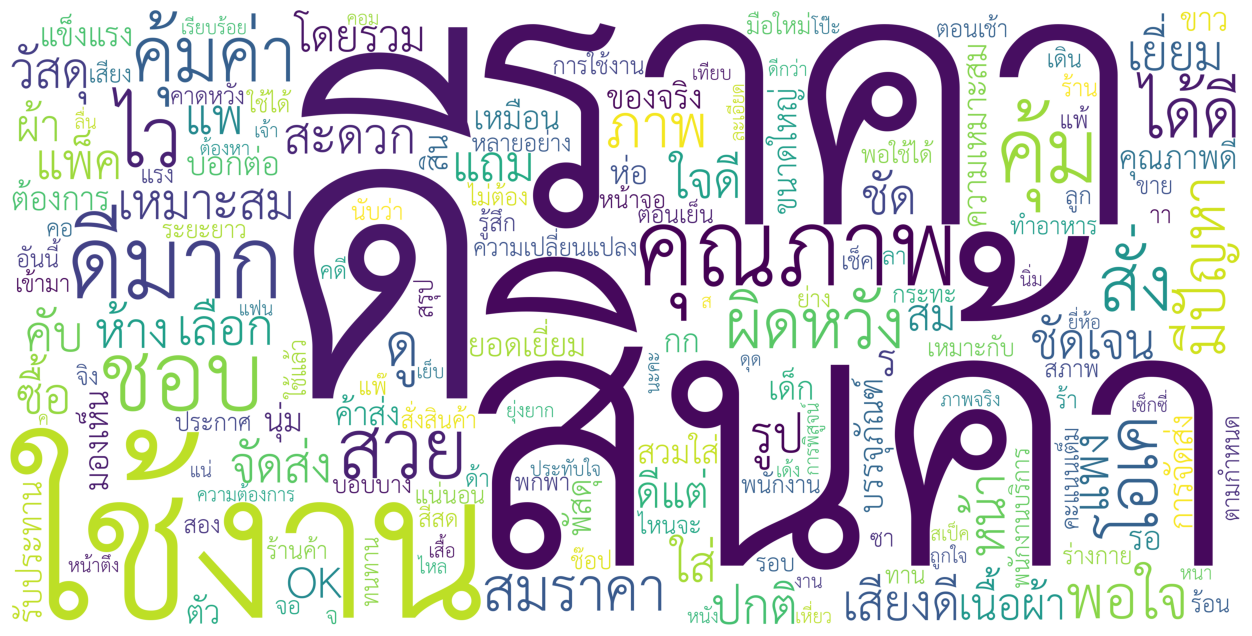

In [ ]:
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['sentiment'] == 'pos']
pos_word_all = " ".join(text for text in df_pos['text_tokens'])
reg = r"[‡∏Å-‡πôa-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path='/content/THSarabunNew.ttf', regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
df_neg = df[df['sentiment'] == 'neg']
neg_word_all = " ".join(text for text in df_neg['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path='/content/THSarabunNew.ttf', regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'‡∏ã‡∏∑‡πâ‡∏≠': 91,
 '‡πÅ‡∏•‡πâ‡∏ß': 364,
 '‡∏ú‡∏¥‡∏î‡∏´‡∏ß‡∏±‡∏á': 171,
 '‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤': 258,
 '‡πÑ‡∏°‡πà': 393,
 '‡∏°‡∏µ': 193,
 '‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û': 58,
 '‡∏´‡∏°‡∏î': 267,
 '‡∏ó‡∏≥‡πÑ‡∏°': 135,
 '‡πÅ‡∏à‡πâ‡∏á': 345,
 '‡∏Ç‡∏∂‡πâ‡∏ô': 33,
 '‡∏ß‡πà‡∏≤': 239,
 '‡∏≠‡∏∞': 279,
 '‡∏Å‡∏î': 4,
 '‡πÉ‡∏™‡πà': 384,
 '‡∏ï‡∏∞‡∏Å‡∏£‡πâ‡∏≤': 111,
 '‡πÑ‡∏õ': 392,
 '‡πÄ‡∏ñ‡∏≠‡∏∞': 301,
 '‡πÄ‡∏ã‡πá‡∏á': 296,
 '‡πÄ‡∏£‡∏¢': 314,
 '‡∏ä‡∏≠‡∏ö': 81,
 '‡∏ó‡∏µ‡πà': 137,
 '‡∏™‡πà‡∏á': 263,
 '‡πÄ‡∏£‡πá‡∏ß': 318,
 '‡∏°‡∏≤‡∏Å': 189,
 '‡∏Ñ‡∏£‡∏±‡∏ö': 37,
 '‡∏ó‡∏±‡∏ô': 129,
 '‡πÉ‡∏à‡∏î‡∏µ': 375,
 '‡∏à‡∏¥‡∏á': 78,
 '‡∏™‡∏¥‡∏ô': 257,
 '‡∏Ñ‡πâ‡∏≤‡∏™‡πà‡∏á': 65,
 '‡∏°‡∏≤': 188,
 '‡πÅ‡∏ï‡∏Å‡∏´‡∏±‡∏Å': 347,
 '‡∏¢‡∏±‡∏á': 201,
 '‡πÑ‡∏î‡πâ': 388,
 '‡∏õ‡∏£‡∏∞‡∏Å‡∏≠‡∏ö': 164,
 '‡πÄ‡∏•‡∏¢': 319,
 '‡πÄ‡∏™‡∏µ‡∏¢‡∏Ñ‡∏ß‡∏≤‡∏°‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å': 324,
 '‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å': 362,
 '‡∏ß‡∏±‡∏™‡∏î‡∏∏': 238,
 '‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô': 336,
 '‡∏´‡∏°‡∏î‡∏≠‡∏≤‡∏¢‡∏∏': 268,
 '‡∏£‡∏≠‡∏¢': 211,
 '‡∏ï‡∏≥‡∏´‡∏ô‡∏¥': 117,
 '‡πÄ‡∏õ‡πá‡∏ô': 

In [ ]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])

10  OK  text  ‡∏Å‡∏Å  ‡∏Å‡∏î  \
text_tokens                                                                
‡∏ã‡∏∑‡πâ‡∏≠ ‡πÅ‡∏•‡πâ‡∏ß ‡∏ú‡∏¥‡∏î‡∏´‡∏ß‡∏±‡∏á ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡πÑ‡∏°‡πà ‡∏°‡∏µ ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û               0   0     0   0   0   
‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡∏´‡∏°‡∏î ‡∏ó‡∏≥‡πÑ‡∏° ‡πÑ‡∏°‡πà ‡πÅ‡∏à‡πâ‡∏á ‡∏Ç‡∏∂‡πâ‡∏ô ‡∏ß‡πà‡∏≤ ‡∏´‡∏°‡∏î ‡∏≠‡∏∞ ‡∏Å‡∏î ‡πÉ‡∏™‡πà...   0   0     0   0   1   
‡∏ä‡∏≠‡∏ö ‡∏ó‡∏µ‡πà ‡∏™‡πà‡∏á ‡πÄ‡∏£‡πá‡∏ß ‡∏°‡∏≤‡∏Å ‡∏Ñ‡∏£‡∏±‡∏ö ‡∏ó‡∏±‡∏ô ‡πÉ‡∏à‡∏î‡∏µ ‡∏à‡∏¥‡∏á               0   0     0   0   0   
‡∏™‡∏¥‡∏ô ‡∏Ñ‡πâ‡∏≤‡∏™‡πà‡∏á ‡∏°‡∏≤ ‡πÅ‡∏ï‡∏Å‡∏´‡∏±‡∏Å ‡∏¢‡∏±‡∏á ‡πÑ‡∏°‡πà ‡πÑ‡∏î‡πâ ‡∏õ‡∏£‡∏∞‡∏Å‡∏≠‡∏ö ‡πÄ‡∏•‡∏¢ ‡πÄ‡∏™‡∏µ...   0   0     0   0   0   
‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û ‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å ‡∏ß‡∏±‡∏™‡∏î‡∏∏ ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô ‡∏´‡∏°‡∏î‡∏≠‡∏≤‡∏¢‡∏∏ ‡πÅ‡∏•‡πâ‡∏ß       0   0     0   0   0   
...                                                 ..  ..   ...  ..  ..   
‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å ‡∏£‡∏π‡∏õ ‡∏î‡∏π ‡∏™‡∏ß‡∏¢‡∏´‡∏£‡∏π ‡∏î‡∏µ ‡∏ô‡∏∞ ‡πÅ‡∏ï‡πà ‡∏°‡∏≤ ‡πÄ‡∏à‡∏≠ ‡∏Ç‡∏≠‡∏á‡∏à‡∏£‡∏¥‡∏á ‡∏ô...   0   0     0   0   0   
‡∏ï‡∏Å‡πÉ‡∏à ‡∏°‡∏≤‡∏Å ‡πÇ‡∏Ñ‡∏ï‡∏£ ‡πÅ‡∏¢‡πà ‡∏Å‡πà‡∏≠‡∏ô‡∏´‡∏ô‡πâ‡∏≤‡∏ô‡∏µ‡πâ ‡πÉ‡∏ä‡πâ ‡∏î‡∏µ ‡∏ä‡∏≠‡∏ö ‡∏°‡∏≤‡∏Å ‡∏õ‡∏•...   0   0     0   0   0   
‡πÑ‡∏°‡πà ‡∏û‡∏∂‡∏á‡∏û‡∏≠‡πÉ‡∏à ‡πÄ‡∏•‡∏¢ ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡∏ú‡∏•‡∏¥‡∏ï ‡∏à‡∏≤‡∏Å ‡∏û‡∏•‡∏≤‡∏™‡∏ï‡∏¥‡∏Å ‡∏î‡πâ‡∏≠‡∏¢ ‡∏Ñ‡∏∏...   0   0     0   0   0   
‡∏¢‡∏≠‡∏î‡πÄ‡∏¢‡∏µ‡πà‡∏¢‡∏° ‡∏Ñ‡πà‡∏∞ ‡∏£‡∏≤‡∏Ñ‡∏≤ ‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏° ‡∏ö‡∏≠‡∏Å‡∏ï‡πà‡∏≠ ‡πÑ‡∏î‡πâ ‡πÄ‡∏•‡∏¢ ‡∏Ñ‡πà‡∏∞        0   0     0   0   0   
‡∏™‡∏ß‡∏¢ ‡∏°‡∏≤ ‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô ‡∏á‡πà‡∏≤‡∏¢ ‡∏°‡∏≤‡∏Å ‡∏ó‡∏µ‡πà ‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç ‡∏™‡πà‡∏á ‡πÄ‡∏£‡πá‡∏ß ‡∏°‡∏≤‡∏Å        0   0     0   0   0   

                                                    ‡∏Å‡∏£‡∏∞‡∏ó‡∏∞  ‡∏Å‡∏£‡∏∞‡πÄ‡∏õ‡πã‡∏≤  ‡∏Å‡∏•‡∏¥‡πà‡∏ô  \
text_tokens                                                                 
‡∏ã‡∏∑‡πâ‡∏≠ ‡πÅ‡∏•‡πâ‡∏ß ‡∏ú‡∏¥‡∏î‡∏´‡∏ß‡∏±‡∏á ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡πÑ‡∏°‡πà ‡∏°‡∏µ ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û                  0        0      0   
‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡∏´‡∏°‡∏î ‡∏ó‡∏≥‡πÑ‡∏° ‡πÑ‡∏°‡πà ‡πÅ‡∏à‡πâ‡∏á ‡∏Ç‡∏∂‡πâ‡∏ô ‡∏ß‡πà‡∏≤ ‡∏´‡∏°‡∏î ‡∏≠‡∏∞ ‡∏Å‡∏î ‡πÉ‡∏™‡πà...      0        0      0   
‡∏ä‡∏≠‡∏ö ‡∏ó‡∏µ‡πà ‡∏™‡πà‡∏á ‡πÄ‡∏£‡πá‡∏ß ‡∏°‡∏≤‡∏Å ‡∏Ñ‡∏£‡∏±‡∏ö ‡∏ó‡∏±‡∏ô ‡πÉ‡∏à‡∏î‡∏µ ‡∏à‡∏¥‡∏á                  0        0      0   
‡∏™‡∏¥‡∏ô ‡∏Ñ‡πâ‡∏≤‡∏™‡πà‡∏á ‡∏°‡∏≤ ‡πÅ‡∏ï‡∏Å‡∏´‡∏±‡∏Å ‡∏¢‡∏±‡∏á ‡πÑ‡∏°‡πà ‡πÑ‡∏î‡πâ ‡∏õ‡∏£‡∏∞‡∏Å‡∏≠‡∏ö ‡πÄ‡∏•‡∏¢ ‡πÄ‡∏™‡∏µ...      0        0      0   
‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û ‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å ‡∏ß‡∏±‡∏™‡∏î‡∏∏ ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô ‡∏´‡∏°‡∏î‡∏≠‡∏≤‡∏¢‡∏∏ ‡πÅ‡∏•‡πâ‡∏ß          0        0      0   
...                                                   ...      ...    ...   
‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å ‡∏£‡∏π‡∏õ ‡∏î‡∏π ‡∏™‡∏ß‡∏¢‡∏´‡∏£‡∏π ‡∏î‡∏µ ‡∏ô‡∏∞ ‡πÅ‡∏ï‡πà ‡∏°‡∏≤ ‡πÄ‡∏à‡∏≠ ‡∏Ç‡∏≠‡∏á‡∏à‡∏£‡∏¥‡∏á ‡∏ô...      0        0      0   
‡∏ï‡∏Å‡πÉ‡∏à ‡∏°‡∏≤‡∏Å ‡πÇ‡∏Ñ‡∏ï‡∏£ ‡πÅ‡∏¢‡πà ‡∏Å‡πà‡∏≠‡∏ô‡∏´‡∏ô‡πâ‡∏≤‡∏ô‡∏µ‡πâ ‡πÉ‡∏ä‡πâ ‡∏î‡∏µ ‡∏ä‡∏≠‡∏ö ‡∏°‡∏≤‡∏Å ‡∏õ‡∏•...      0        0      1   
‡πÑ‡∏°‡πà ‡∏û‡∏∂‡∏á‡∏û‡∏≠‡πÉ‡∏à ‡πÄ‡∏•‡∏¢ ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡∏ú‡∏•‡∏¥‡∏ï ‡∏à‡∏≤‡∏Å ‡∏û‡∏•‡∏≤‡∏™‡∏ï‡∏¥‡∏Å ‡∏î‡πâ‡∏≠‡∏¢ ‡∏Ñ‡∏∏...      0        0      0   
‡∏¢‡∏≠‡∏î‡πÄ‡∏¢‡∏µ‡πà‡∏¢‡∏° ‡∏Ñ‡πà‡∏∞ ‡∏£‡∏≤‡∏Ñ‡∏≤ ‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏° ‡∏ö‡∏≠‡∏Å‡∏ï‡πà‡∏≠ ‡πÑ‡∏î‡πâ ‡πÄ‡∏•‡∏¢ ‡∏Ñ‡πà‡∏∞           0        0      0   
‡∏™‡∏ß‡∏¢ ‡∏°‡∏≤ ‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô ‡∏á‡πà‡∏≤‡∏¢ ‡∏°‡∏≤‡∏Å ‡∏ó‡∏µ‡πà ‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç ‡∏™‡πà‡∏á ‡πÄ‡∏£‡πá‡∏ß ‡∏°‡∏≤‡∏Å           0        0      0   

                                                    ‡∏Å‡∏•‡πà‡∏≠‡∏á  ‡∏Å‡∏ß‡πà‡∏≤  ...  ‡πÑ‡∏°‡πà  \
text_tokens                                                      ...        
‡∏ã‡∏∑‡πâ‡∏≠ ‡πÅ‡∏•‡πâ‡∏ß ‡∏ú‡∏¥‡∏î‡∏´‡∏ß‡∏±‡∏á ‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡πÑ‡∏°‡πà ‡∏°‡∏µ ‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û                  0     0  ...    1   
‡∏™‡∏¥‡∏ô‡∏Ñ‡πâ‡∏≤ ‡∏´‡∏°‡∏î ‡∏ó‡∏≥‡πÑ‡∏° ‡πÑ‡∏°‡πà ‡πÅ‡∏à‡πâ‡∏á ‡∏Ç‡∏∂‡πâ‡∏ô ‡∏ß‡πà‡∏≤ ‡∏´‡∏°‡∏î ‡∏≠‡∏∞ ‡∏Å‡∏î ‡πÉ‡∏™‡πà...      0     0  ...    1   
‡∏ä‡∏≠‡∏ö ‡∏ó‡∏µ‡πà ‡∏™‡πà‡∏á ‡πÄ‡∏£‡πá‡∏ß ‡∏°‡∏≤‡∏Å ‡∏Ñ‡∏£‡∏±‡∏ö ‡∏ó‡∏±‡∏ô ‡πÉ‡∏à‡∏î‡∏µ 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.95      1.00      0.98        21
         pos       1.00      0.94      0.97        18

    accuracy                           0.97        39
   macro avg       0.98      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39



In [ ]:
sentence = "‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å‡∏Å‡∏Å‡∏Å‡∏Å‡∏Å‡∏Ñ‡πà‡∏∞ ‡πÄ‡∏≠‡∏≤‡∏Ç‡∏≠‡∏á‡∏û‡∏±‡∏á‡∏°‡∏≤‡πÉ‡∏´‡πâ‡∏â‡∏∏‡∏ô‡∏°‡∏≤‡∏î‡∏Ñ‡πà‡∏∞‡πÑ‡∏°‡πà‡∏û‡∏≠‡πÉ‡∏à‡πÄ‡∏õ‡πá‡∏ô‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏≤‡∏Å‡∏Ñ‡πà‡∏∞. ‡∏™‡πà‡∏á‡∏Ç‡∏≠‡∏á ‡∏Å‡πá‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÉ‡∏ö‡πÄ‡∏™‡∏£‡πá‡∏à. ‡πÑ‡∏°‡πà‡πÑ‡∏´‡∏ß‡∏à‡∏∞‡πÄ‡∏Ñ‡∏•‡∏µ‡∏¢‡∏£‡πå"
prediction = model.predict([sentence])
print(prediction[0])

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3982: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `

Decoding outputs:   0%|          | 0/1 [00:00<?, ?it/s]

‡πÄ‡∏≠‡∏≤‡∏Ç‡∏≠‡∏á‡∏û‡∏±‡∏á‡∏°‡∏≤‡∏â‡∏∏‡∏ô‡∏°‡∏≤‡∏î


In [ ]:
my_text = prediction[0]
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['neg'], dtype=object)